In [1]:
%load_ext autoreload
%autoreload 2


from tools import prepare_data, load_data, get_label_dict, get_word_labels
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
img_folder= "data/tiny-imagenet-200/"

In [3]:
X_train, _ = load_data()

Loading train data

Finished loading train data



In [4]:
num_samples = 1000
X_copy = np.copy(X_train[:num_samples])

### From here, we can see how the dimensionality reduction reduces the variance of the dataset. We can choose a baseline of the variance retained for our future training. For example if we want our preprocessed dataset to retain 90% of data, we would chose a number of dimensions equal to the baseline 90 as determined by the graph.

In [5]:
k_dimensions = [i for i in range(1, 12288, 100)]
retained_variance_percentage = []
x_vals = [i for i in k_dimensions]
pca = PCA()
X_fit = pca.fit(X_copy.reshape((num_samples,-1)))
for k_dim in k_dimensions:
    retained_variance_percentage.append(np.sum(pca.explained_variance_ratio_[:k_dim]))

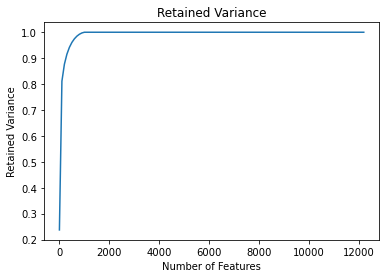

In [6]:
plt.figure()
plt.plot(x_vals, retained_variance_percentage)
plt.xlabel("Number of Features")
plt.ylabel("Retained Variance")
plt.title("Retained Variance")
plt.savefig("pca_var.png",format='png')
plt.show()

##### We can now pre-process the incoming images by removing dimensions of 'low-variance' while maintaining .95 of the explained variance in the dataset. In this experiment we perform the dimensionality-reduction on the red-color channel. As shown by the shapes of these components. We only need 6 components to retain 95 percent of the variation.

In [7]:
X_raw = X_copy[0][:,:,0]
X = X_raw - np.mean(X_raw, axis=0)
pca = PCA(n_components=0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
V, S = pca.components_.T, pca.singular_values_

pt = X_copy[0][:,:,0]

print(V.shape, pt.shape)
pt =  X @ V @ V.T + np.mean(X_raw)

(64, 6) (64, 64)


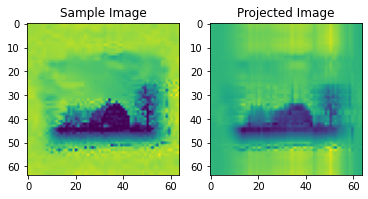

In [13]:
fig, axes = plt.subplots(1, 2)
input_image = X_copy[0][:,:,0].reshape((64,64))
ax = axes[0]
pca_input_image = pt.reshape((64, 64))
ax.set_title("Sample Image")
ax.imshow(input_image) 
ax = axes[1]
ax.imshow(pca_input_image)
ax.set_title("Projected Image")
plt.savefig("PCA_img.png",format='png')
plt.show()

### We will find similar results if we perform PCA independently across all three color channels

In [10]:
X_red, X_blue, X_green = X_train[:num_samples,:,:,0], X_train[:num_samples,:,:,1], X_train[:num_samples,:,:,2]
X_red = X_red.reshape((num_samples, -1))
X_blue = X_blue.reshape((num_samples, -1))
X_green = X_green.reshape((num_samples, -1))

In [11]:
color_channels = {"red": X_red, "blue": X_blue, "green": X_green}

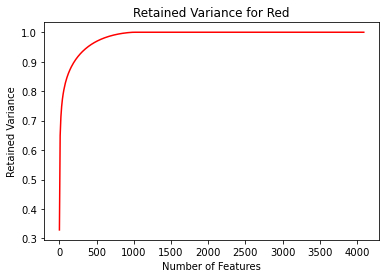

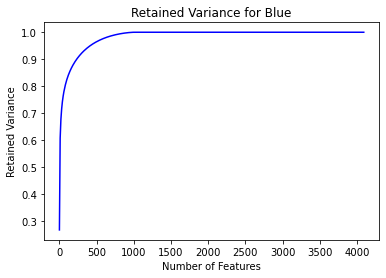

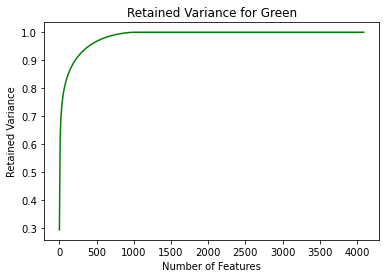

In [12]:
k_dimensions = [i for i in range(1, 4096, 10)]
retained_variance_percentage = []
x_vals = [i for i in k_dimensions]

for color, data in color_channels.items():
    pca = PCA()
    plt.figure()
    X_fit = pca.fit(data)
    for k_dim in k_dimensions:
        retained_variance_percentage.append(np.sum(pca.explained_variance_ratio_[:k_dim]))
    plt.plot(x_vals, retained_variance_percentage, label=color, color=color)
    plt.xlabel("Number of Features")
    plt.ylabel("Retained Variance")
    plt.title("Retained Variance for %c%s" % (color[0].upper(), color[1:]))
    plt.savefig(f'pca_var_{color}.png',format='png')
    plt.show()
    retained_variance_percentage = []